[array([69.29701203, 71.75704735, 66.3226963 ]), array([179.15867448, 180.62164415, 174.28458773])]


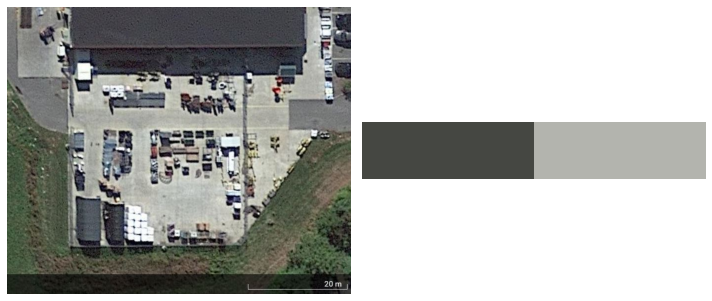

Empty lot pixels 80544


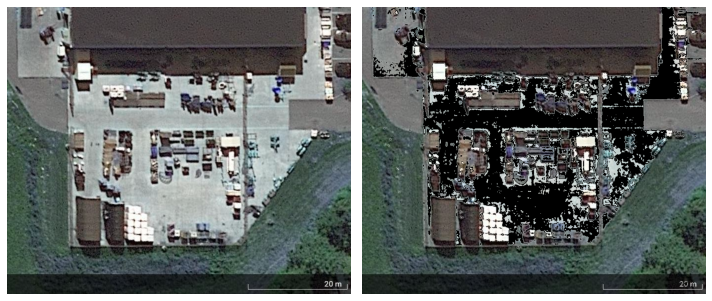

In [3]:
from sklearn.cluster import KMeans
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread("../AI-ML Tractor Analytics/SideLotImages/Scrub_Store_2.JPG")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

clt = KMeans(n_clusters=2)

def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()
    
def palette(clusters):
    colors = []
    width=300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        colors.append(centers)
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    print(list(colors))
    return palette, colors


# Light -1   Dark -0
def isLightOrDark(rgbColor=[0,128,255]):
    [r,g,b]=rgbColor
    hsp = math.sqrt(0.299 * (r * r) + 0.587 * (g * g) + 0.114 * (b * b))
    if (hsp>127.5):
        return 1
    else:
        return 0

clt_1 = clt.fit(rgb_img.reshape(-1, 3))
palette_out = palette(clt_1)
show_img_compar(rgb_img, palette_out[0])

light_color = None
for color in palette_out[1]:
    if isLightOrDark(color) == 1:
        light_color = color
        break

def color_diff1(c1,c2):
    r1,g1,b1 = c1
    r2,g2,b2 = c2
    d=sqrt((r2-r1)**2+(g2-g1)**2+(b2-b1)**2)
    if d < 100:
        return True
    return False

def color_diff(c1,c2):
    r1,g1,b1 = c1
    r2,g2,b2 = c2
    diff = 25
    if abs(r1-r2) < diff and abs(g1-g2) < diff and abs(b1-b2) < diff:
        return True
    return False

blank_image = np.zeros((img.shape[0],img.shape[1],3), np.uint8)
empty_lot_pixels = 0
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
#         print(image[i,j])
        x = img[i,j]
#         print(type(x))
        if color_diff(list(x),light_color):
#             print(img[i,j])
            empty_lot_pixels+=1
            blank_image[i,j] = [0,0,0]
        else:
            blank_image[i,j] = list(x)
            
print(f"Empty lot pixels {empty_lot_pixels}")
f, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].imshow(img)
ax[1].imshow(blank_image)
ax[0].axis('off') #hide the axis
ax[1].axis('off')
f.tight_layout()
plt.show()
# cv2.imshow("act",img)
# cv2.imshow("",blank_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [5]:
!pip install opencv-python

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [3]:
print(sys.executable)

/snap/jupyter/6/bin/python
